In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# physio_path = "/content/drive/MyDrive/Colab Notebooks/FYP/data/Exp4/Exp4/Preprocessed/Physio/periods/features_segm_1.csv"
# driving_path = "/content/drive/MyDrive/Colab Notebooks/FYP/data/Exp4/Exp4/Preprocessed/Driving/features_tor_10s_30s_rows.csv"
# pvt_path = "/content/drive/MyDrive/Colab Notebooks/FYP/data/Exp4/Exp4/Preprocessed/PVT/data_PVT_no_outliers_mean_sd.csv"

In [3]:
physio_path = "../Exp4/Preprocessed/Physio/periods/features_segm_1.csv"
driving_path = "../Exp4/Preprocessed/Driving/features_tor_10s_30s_rows.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

physio_data = pd.read_csv(physio_path)
driving_data = pd.read_csv(driving_path)

columns_to_drop = ['label_sleep', 'label_first_scenario', 'label_time_exp', 'period']
driving_data = driving_data.drop(columns=columns_to_drop)

data = pd.merge(physio_data, driving_data, on='subject_id', how='inner')

print(data.head())

   subject_id  label_sleep label_first_scenario  label_time_exp period  \
0           1            0                Rural              16  Rural   
1           1            0                Rural              16  Urban   
2           2            1                Urban              16  Urban   
3           2            1                Urban              16  Rural   
4           3            0                Rural              16  Rural   

   segment_id  EDA_filtered_mean_Bl  EDA_filtered_min_Bl  EDA_filtered_max_Bl  \
0           0              2.188997             1.648550             3.448137   
1           0              2.188997             1.648550             3.448137   
2           0             11.196484             9.901155            14.980536   
3           0             11.196484             9.901155            14.980536   
4           0             14.989715            10.716242            23.833487   

   EDA_filtered_std_Bl  ...  TO_Decision_Rural  TO_RT_Rural  TO_MaxS

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Columns: 412 entries, subject_id to TO_MaxBraking_Urban
dtypes: float64(405), int64(5), object(2)
memory usage: 373.5+ KB


In [6]:
data.head()

,subject_id,label_sleep,label_first_scenario,label_time_exp,period,segment_id,EDA_filtered_mean_Bl,EDA_filtered_min_Bl,EDA_filtered_max_Bl,EDA_filtered_std_Bl,...,TO_Decision_Rural,TO_RT_Rural,TO_MaxSWA_Rural,TO_ReengageTime_Rural,TO_MaxBraking_Rural,TO_Decision_Urban,TO_RT_Urban,TO_MaxSWA_Urban,TO_ReengageTime_Urban,TO_MaxBraking_Urban
0,1,0,Rural,16,Rural,0,2.188997,1.648550,3.448137,0.401299,...,1,2.450,5.0,12.399,100.0,1.0,1.484,1.0,9.900,100.0
1,1,0,Rural,16,Urban,0,2.188997,1.648550,3.448137,0.401299,...,1,2.450,5.0,12.399,100.0,1.0,1.484,1.0,9.900,100.0
2,2,1,Urban,16,Urban,0,11.196484,9.901155,14.980536,1.039038,...,4,2.900,2.0,3.233,0.0,NaN,NaN,NaN,NaN,NaN
3,2,1,Urban,16,Rural,0,11.196484,9.901155,14.980536,1.039038,...,4,2.900,2.0,3.233,0.0,NaN,NaN,NaN,NaN,NaN
4,3,0,Rural,16,Rural,0,14.989715,10.716242,23.833487,2.427384,...,1,2.233,7.0,25.767,100.0,1.0,2.918,5.0,14.068,95.2


In [7]:
label_counts = data["label_sleep"].value_counts()
print(label_counts)

label_sleep
1    62
0    54
Name: count, dtype: int64


C:\Users\kahch\AppData\Local\Temp\ipykernel_48616\3141730654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


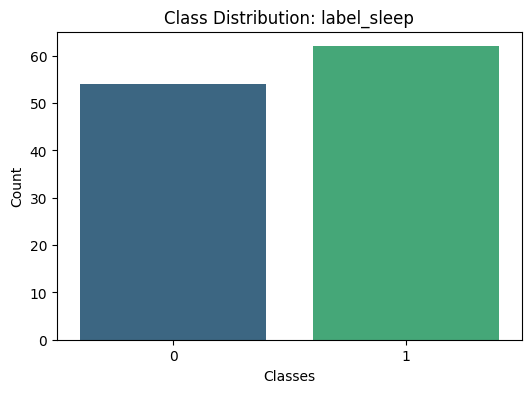

In [8]:
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Class Distribution: label_sleep")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


#Data Preprocessing

In [ ]:
columns_to_exclude = data.columns[data.isnull().mean() > 0.5]
data = data.drop(columns=columns_to_exclude)

data.replace([np.inf, -np.inf], np.nan, inplace=True)

numerical_data = data.select_dtypes(include=['number'])

missing_values = numerical_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

data.fillna(numerical_data.mean(), inplace=True)

missing_after = data.isnull().sum()
print("\nMissing Values After Filling:\n", missing_after[missing_after > 0])

if missing_after.sum() == 0:
    print("\nAll missing values have been successfully filled!")
else:
    print("\nThere are still missing values in the dataset.")

Missing Values:
 HRV_SDANN2_Bl                    44
HRV_SDNNI2_Bl                    44
RRV_SampEn_Bl                     2
HRV_SDANN2_Dr                     1
HRV_SDNNI2_Dr                     1
HRV_SDANN5_Dr                     4
HRV_SDNNI5_Dr                     4
HRV_VLF_Dr                        9
HRV_DFA_alpha1_ExpRange_Dr        3
HRV_DFA_alpha1_ExpMean_Dr         3
HRV_DFA_alpha1_DimRange_Dr        3
HRV_DFA_alpha1_DimMean_Dr         3
RRV_SampEn_Dr                     1
HRV_DFA_alpha1_DimMean_Dr-Bl      3
HRV_DFA_alpha1_DimRange_Dr-Bl     3
HRV_DFA_alpha1_ExpMean_Dr-Bl      3
HRV_DFA_alpha1_ExpRange_Dr-Bl     3
HRV_SDANN2_Dr-Bl                 45
HRV_SDNNI2_Dr-Bl                 45
RRV_DFA_alpha1_Dr-Bl              2
RRV_DFA_alpha1_DimMean_Dr-Bl      2
RRV_DFA_alpha1_DimRange_Dr-Bl     2
RRV_DFA_alpha1_ExpMean_Dr-Bl      2
RRV_DFA_alpha1_ExpRange_Dr-Bl     2
RRV_SampEn_Dr-Bl                  3
RRV_DFA_alpha1_Bl                 2
RRV_DFA_alpha1_ExpRange_Bl        2
RRV_DFA_alp

In [10]:
data["label_first_scenario"] = data["label_first_scenario"].map({"Rural": 0, "Urban": 1})
data["period"] = data["period"].map({"Rural": 0, "Urban": 1})

print("\n'period' Column After Encoding:\n", data["label_first_scenario"].head())
print("\n'period' Column After Encoding:\n", data["period"].head())


'period' Column After Encoding:
 0    0
1    0
2    1
3    1
4    0
Name: label_first_scenario, dtype: int64

'period' Column After Encoding:
 0    0
1    1
2    1
3    0
4    0
Name: period, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["label_sleep"] = label_encoder.fit_transform(data["label_sleep"])

print("Encoded Labels:\n", data["label_sleep"].unique())

Encoded Labels:
 [0 1]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

X = data.drop(columns=['subject_id', 'label_sleep']).values
y = data['label_sleep'].values

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training Set Size: {x_train.shape}")
print(f"Testing Set Size: {x_test.shape}")

scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

Training Set Size: (92, 392)
Testing Set Size: (24, 392)


In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))

x_train_rnn = x_train_norm.reshape(x_train_norm.shape[0], x_train_norm.shape[1], 1)
x_test_rnn = x_test_norm.reshape(x_test_norm.shape[0], x_test_norm.shape[1], 1)

input_size = x_train_norm.shape[1]
output_size = y_train.shape[1]

model = models.Sequential([
    layers.SimpleRNN(64, activation='tanh', return_sequences=True, input_shape=(x_train_rnn.shape[1], 1)),
    layers.Dropout(0.3),

    layers.SimpleRNN(32, activation='tanh', return_sequences=False),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.4),

    layers.Dense(y_train.shape[1], activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(
    x_train_rnn, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test_rnn, y_test),
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

val_loss, val_accuracy = model.evaluate(x_test_rnn, y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

y_pred = model.predict(x_test_rnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

Epoch 1/100


c:\Users\kahch\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.4859 - loss: 1.1756 - val_accuracy: 0.5000 - val_loss: 1.1461
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6683 - loss: 1.0897 - val_accuracy: 0.5417 - val_loss: 1.1378
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5535 - loss: 1.1167 - val_accuracy: 0.5833 - val_loss: 1.1183
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6853 - loss: 1.0083 - val_accuracy: 0.5417 - val_loss: 1.1042
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6799 - loss: 1.0125 - val_accuracy: 0.5833 - val_loss: 1.0890
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6807 - loss: 1.0175 - val_accuracy: 0.5833 - val_loss: 1.0762
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6145 - loss: 1.0076 - val_accuracy: 0.6250 - val_loss: 1.0643
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7204 - loss: 0.9922 - val_accuracy: 0.5417 - val_loss: 1.0556
Epo

In [14]:
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))

accuracy = accuracy_score(y_true_classes, y_pred_classes)
if y_test.shape[1] == 2:
    roc_auc = roc_auc_score(y_true_classes, y_pred[:, 1])
else:
    roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')

precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.77      0.77      0.77        13

    accuracy                           0.75        24
   macro avg       0.75      0.75      0.75        24
weighted avg       0.75      0.75      0.75        24

Accuracy: 0.75
ROC-AUC Score: 0.82
Precision: 0.75
Recall: 0.75
F1-Score: 0.75


<Figure size 1000x800 with 0 Axes>

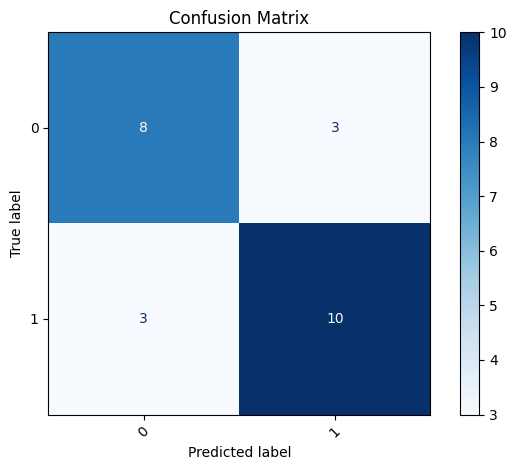

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
class_names = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

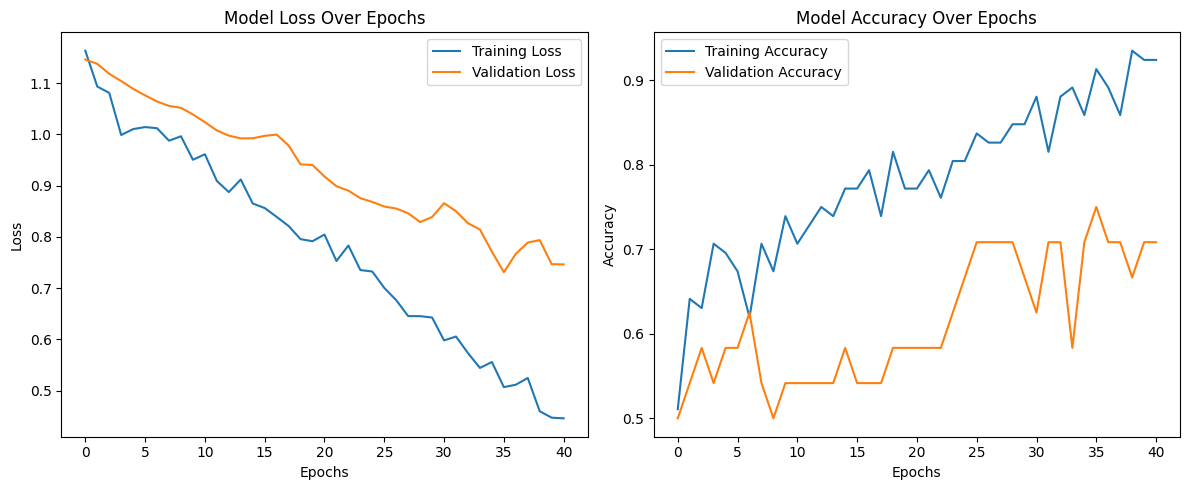

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

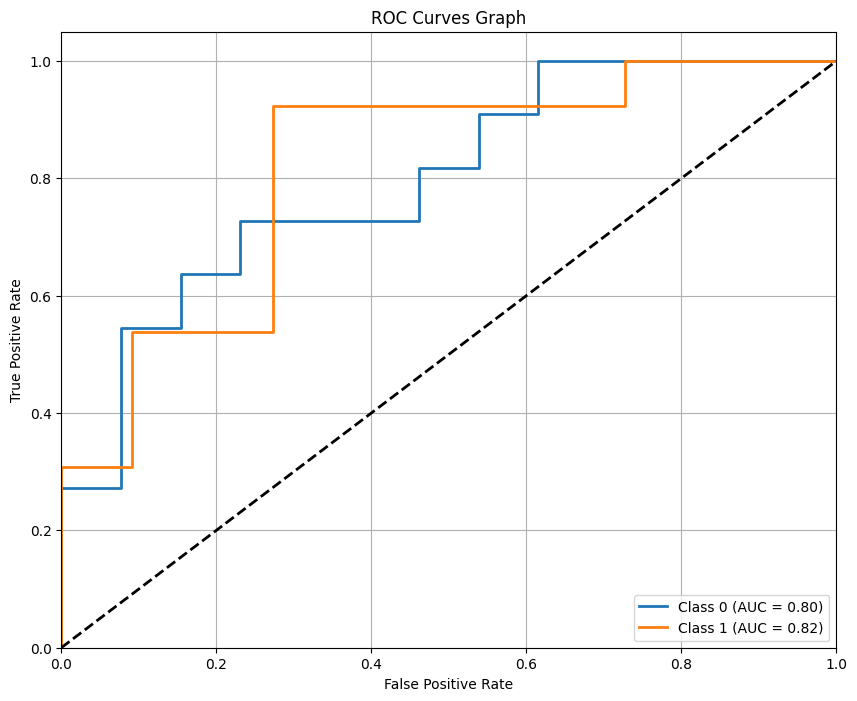

In [17]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score

plt.figure(figsize=(10, 8))

n_classes = y_test.shape[1]

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, 
                label=f'Class {label_encoder.inverse_transform([i])[0]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Graph')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

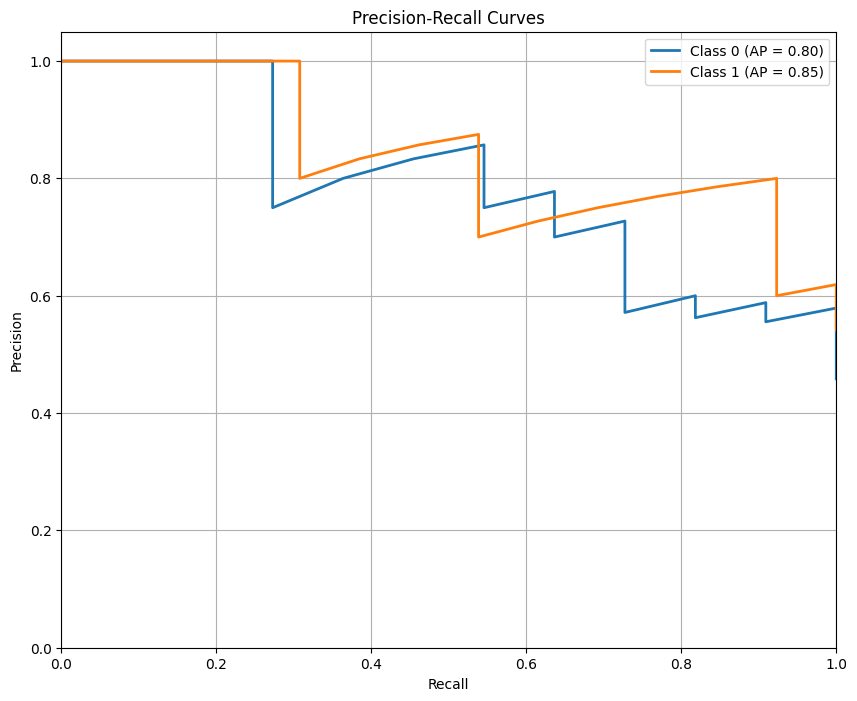

In [18]:
plt.figure(figsize=(10, 8))

n_classes = y_test.shape[1]

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    avg_precision = average_precision_score(y_test[:, i], y_pred[:, i])
    plt.plot(recall, precision, lw=2,
                label=f'Class {label_encoder.inverse_transform([i])[0]} (AP = {avg_precision:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [19]:
!pip install keras-tuner

In [ ]:
import keras_tuner as kt

def build_rnn_model(hp):
    input_size = x_train_rnn.shape[1]
    output_size = y_train.shape[1]

    model = models.Sequential()

    model.add(layers.SimpleRNN(
        units=hp.Choice('rnn_units_1', values=[32, 64]),
        activation='tanh',
        return_sequences=True,
        input_shape=(input_size, 1),
        kernel_regularizer=regularizers.l2(0.01)
    ))

    model.add(layers.Dropout(hp.Choice('dropout_1', values=[0.3, 0.4])))

    model.add(layers.SimpleRNN(
        units=hp.Choice('rnn_units_2', values=[16, 32]),
        activation='tanh',
        return_sequences=False,
        kernel_regularizer=regularizers.l2(0.01)
    ))

    model.add(layers.Dense(
        units=hp.Choice('dense_units_1', values=[32, 64]),
        activation='relu',
        kernel_regularizer=regularizers.l2(0.02)
    ))
    model.add(layers.Dropout(hp.Choice('dropout_2', values=[0.3, 0.4])))

    model.add(layers.Dense(output_size, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[0.001, 0.005])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = kt.Hyperband(
    build_rnn_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='RNN_tuning',
    project_name='RNN_Hyperparameter_Tuning'
)

hyper_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(
    x_train_rnn, y_train,
    validation_data=(x_test_rnn, y_test),
    epochs=150,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[hyper_early_stopping],
    verbose=1
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"RNN Layer 1 Units: {best_hps.get('rnn_units_1')}")
print(f"RNN Layer 2 Units: {best_hps.get('rnn_units_2')}")
print(f"Dropout in Layer 1: {best_hps.get('dropout_1')}")
print(f"Dropout in Dense Layer 1: {best_hps.get('dropout_2')}")
print(f"Dense Layer 1 Units: {best_hps.get('dense_units_1')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    x_train_rnn, y_train,
    validation_data=(x_test_rnn, y_test),
    epochs=150,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[hyper_early_stopping],
    verbose=1
)

val_loss, val_accuracy = best_model.evaluate(x_test_rnn, y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

y_pred_best = best_model.predict(x_test_rnn)
y_pred_best_classes = np.argmax(y_pred_best, axis=1)
y_true_best_classes = np.argmax(y_test, axis=1)

Trial 87 Complete [00h 00m 11s]
val_accuracy: 0.75

Best val_accuracy So Far: 0.9166666865348816
Total elapsed time: 00h 07m 30s
Best Hyperparameters:
RNN Layer 1 Units: 32
RNN Layer 2 Units: 16
Dropout in Layer 1: 0.4
Dropout in Dense Layer 1: 0.4
Dense Layer 1 Units: 64
Learning Rate: 0.005
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.4828 - loss: 1.4260 - val_accuracy: 0.7500 - val_loss: 1.3087
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5178 - loss: 1.3140 - val_accuracy: 0.7083 - val_loss: 1.2429
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5530 - loss: 1.2610 - val_accuracy: 0.7500 - val_loss: 1.1738
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6160 - loss: 1.1776 - val_accuracy: 0.7500 - val_loss: 1.1096
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6581 - loss: 1.1148 - val_accuracy: 0.7083 - val_loss: 1.0613
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6214 - loss

In [21]:
print("Classification Report:")
print(classification_report(y_true_best_classes, y_pred_best_classes))

accuracy = accuracy_score(y_true_best_classes, y_pred_best_classes)
roc_auc = roc_auc_score(y_test, y_pred_best, multi_class='ovr', average='weighted')
precision = precision_score(y_true_best_classes, y_pred_best_classes, average='macro')
recall = recall_score(y_true_best_classes, y_pred_best_classes, average='macro')
f1 = f1_score(y_true_best_classes, y_pred_best_classes, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.76      1.00      0.87        13

    accuracy                           0.83        24
   macro avg       0.88      0.82      0.82        24
weighted avg       0.87      0.83      0.83        24

Accuracy: 0.83
ROC-AUC Score: 0.90
Precision: 0.88
Recall: 0.82
F1-Score: 0.82


<Figure size 1000x800 with 0 Axes>

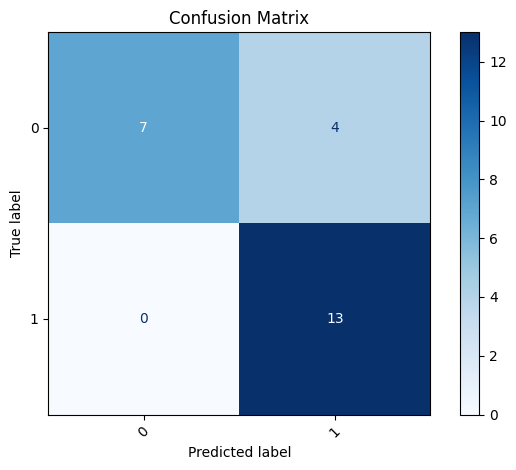

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_best_classes, y_pred_best_classes)

plt.figure(figsize=(10, 8))
class_names = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

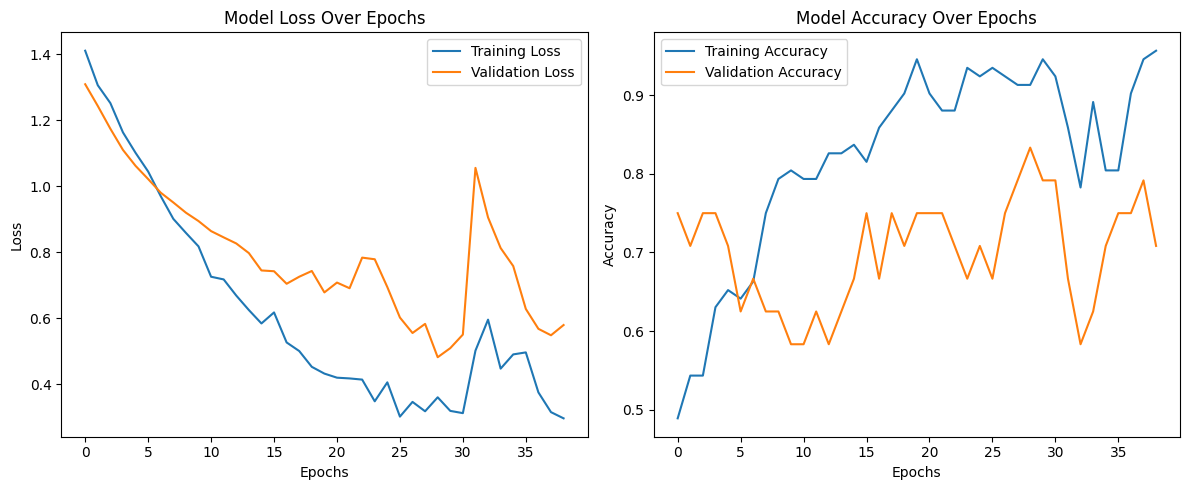

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

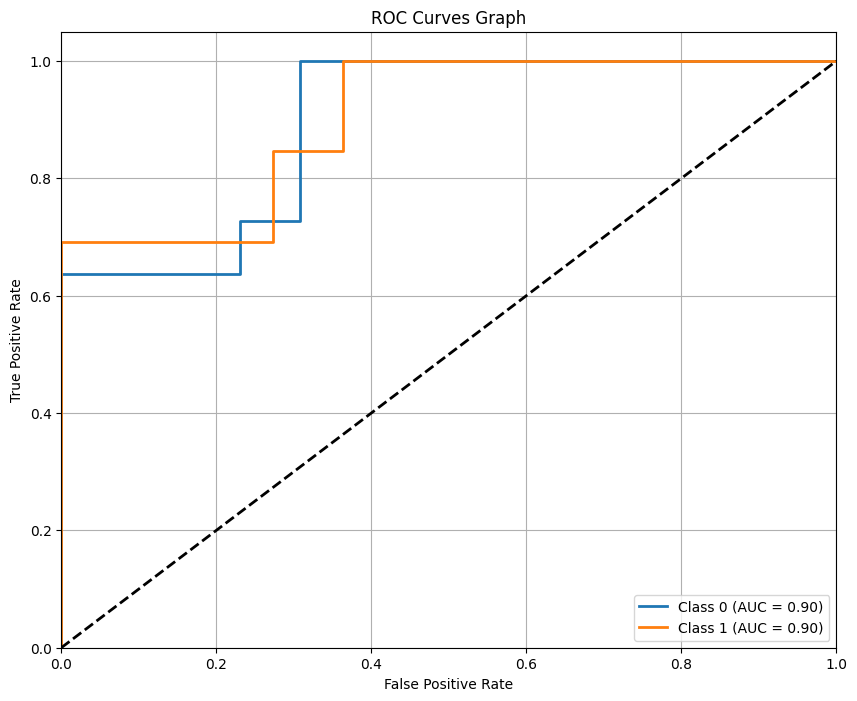

In [24]:
plt.figure(figsize=(10, 8))

n_classes = y_test.shape[1]

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_best[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, 
                label=f'Class {label_encoder.inverse_transform([i])[0]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Graph')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

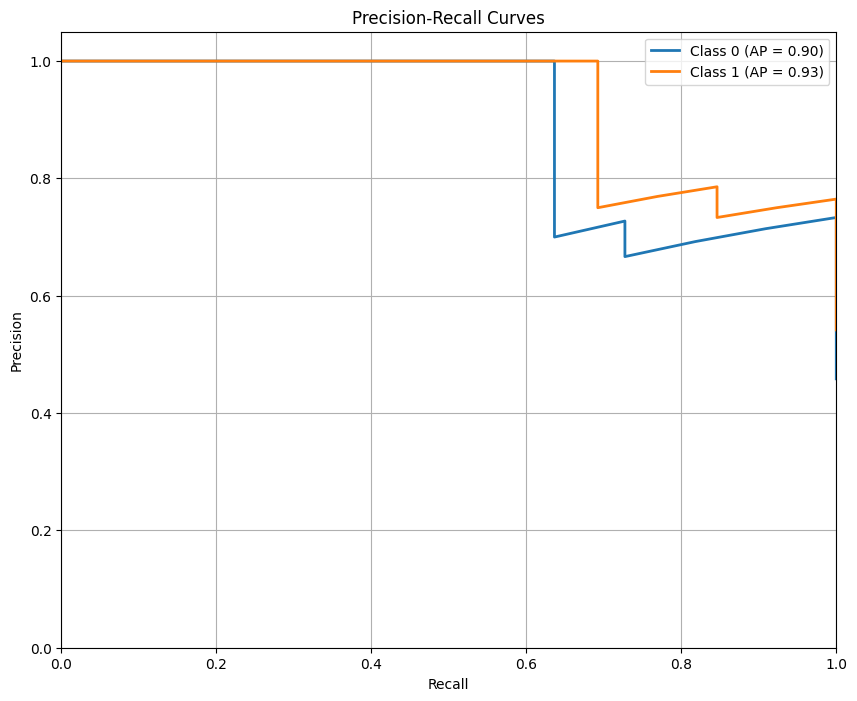

In [25]:
plt.figure(figsize=(10, 8))

n_classes = y_test.shape[1]

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_best[:, i])
    avg_precision = average_precision_score(y_test[:, i], y_pred_best[:, i])
    plt.plot(recall, precision, lw=2,
                label=f'Class {label_encoder.inverse_transform([i])[0]} (AP = {avg_precision:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 392, 64)        │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 392, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,712 (112.16 KB)

 Trainable params: 9,570 (37.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,142 (74.78 KB)

In [27]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 392, 32)        │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 392, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 3,090 (12.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,182 (24.15 KB)